In [30]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [31]:
data_folder = "../../../data/"

figures_folder = "../../Figures/Group3/"

sif_output = "../../sif_files/Group3/"

Selecting as resources just Signor

In [32]:
resources = Resources()

In [33]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

In [34]:
df = resources.interactions

In [35]:
# Remove rows where 'source' or 'target' starts with "CHEBI"
filtered_df = df[~(df['source'].str.startswith('CHEBI') | df['target'].str.startswith('CHEBI'))]

In [36]:
data = pd.read_csv(data_folder + "Northcott_Lin_genes.csv")

In [37]:
data

,WNT,SHH,G3,G4
0,CTNNB1,PTCH1,MYC,PRDM6
1,APC,SUFU,SMARCA4,KMT2D
2,CSNK2B,SMO,GFI1B,KMT2C
3,ARID1A,KMT2D,ATM,KDM6A
4,ARID2,KMT2C,PTEN,ZMYM3
5,ATM,CREBBP,KBTBD4,MED12
6,PIK3CA,GSE1,CRX,GFI1B
7,BAI3,BCOR,HLX,MYCN
8,EPHA7,GLI2,IRX6,OTX2
9,DDX3X,TCF4,LHX9,ZIC1


In [38]:
group3_list = data["G3"].dropna()

In [39]:
group3_list = group3_list.to_list()

Selecting just Group 3 group

In [40]:
group3_list

['MYC',
 'SMARCA4',
 'GFI1B',
 'ATM',
 'PTEN',
 'KBTBD4',
 'CRX',
 'HLX',
 'IRX6',
 'LHX9',
 'NKX3-2']

# Creating a Network starting from All Omnipath interactions

In [41]:
group3_net = Network(group3_list, resources = filtered_df)

Error: node KBTBD4 is not present in the resources database
Error: node IRX6 is not present in the resources database
Error: node LHX9 is not present in the resources database
Error: node NKX3-2 is not present in the resources database


Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [42]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,MYC,P01106,NaN
1,SMARCA4,P51532,NaN
2,GFI1B,Q5VTD9,NaN
3,ATM,Q13315,NaN
4,PTEN,P60484,NaN
5,CRX,O43186,NaN
6,HLX,Q14774,NaN


In [43]:
group3_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=True, connect_with_bias=False, consensus=False)

In [44]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,MYC,P01106,NaN
1,SMARCA4,P51532,NaN
2,GFI1B,Q5VTD9,NaN
3,ATM,Q13315,NaN
4,PTEN,P60484,NaN
...,...,...,...
64,CCNA2,P20248,NaN
65,SIGNOR-C83,SIGNOR-C83,NaN
66,SIGNOR-C16,SIGNOR-C16,NaN
67,POU5F1,Q01860,NaN


In [45]:
group3_net.edges

,source,target,Type,Effect,References
0,P51532,SIGNOR-C92,None,form complex,15627498; 15627498
1,SIGNOR-C92,P01106,None,inhibition,16452181; 16452181
2,P01106,Q96EB6,None,stimulation,26049753; 26049753
3,Q96EB6,P15172,None,inhibition,12887892; 12887892
4,P15172,P51532,None,stimulation,17194702; 17194702
...,...,...,...,...,...
312,SIGNOR-PF4,P08047,None,stimulation,11904305
313,SIGNOR-PF4,Q15796,None,stimulation,10197981
314,SIGNOR-PF4,Q01860,None,inhibition,23024368
315,P11309,Q04206,None,stimulation,19911008


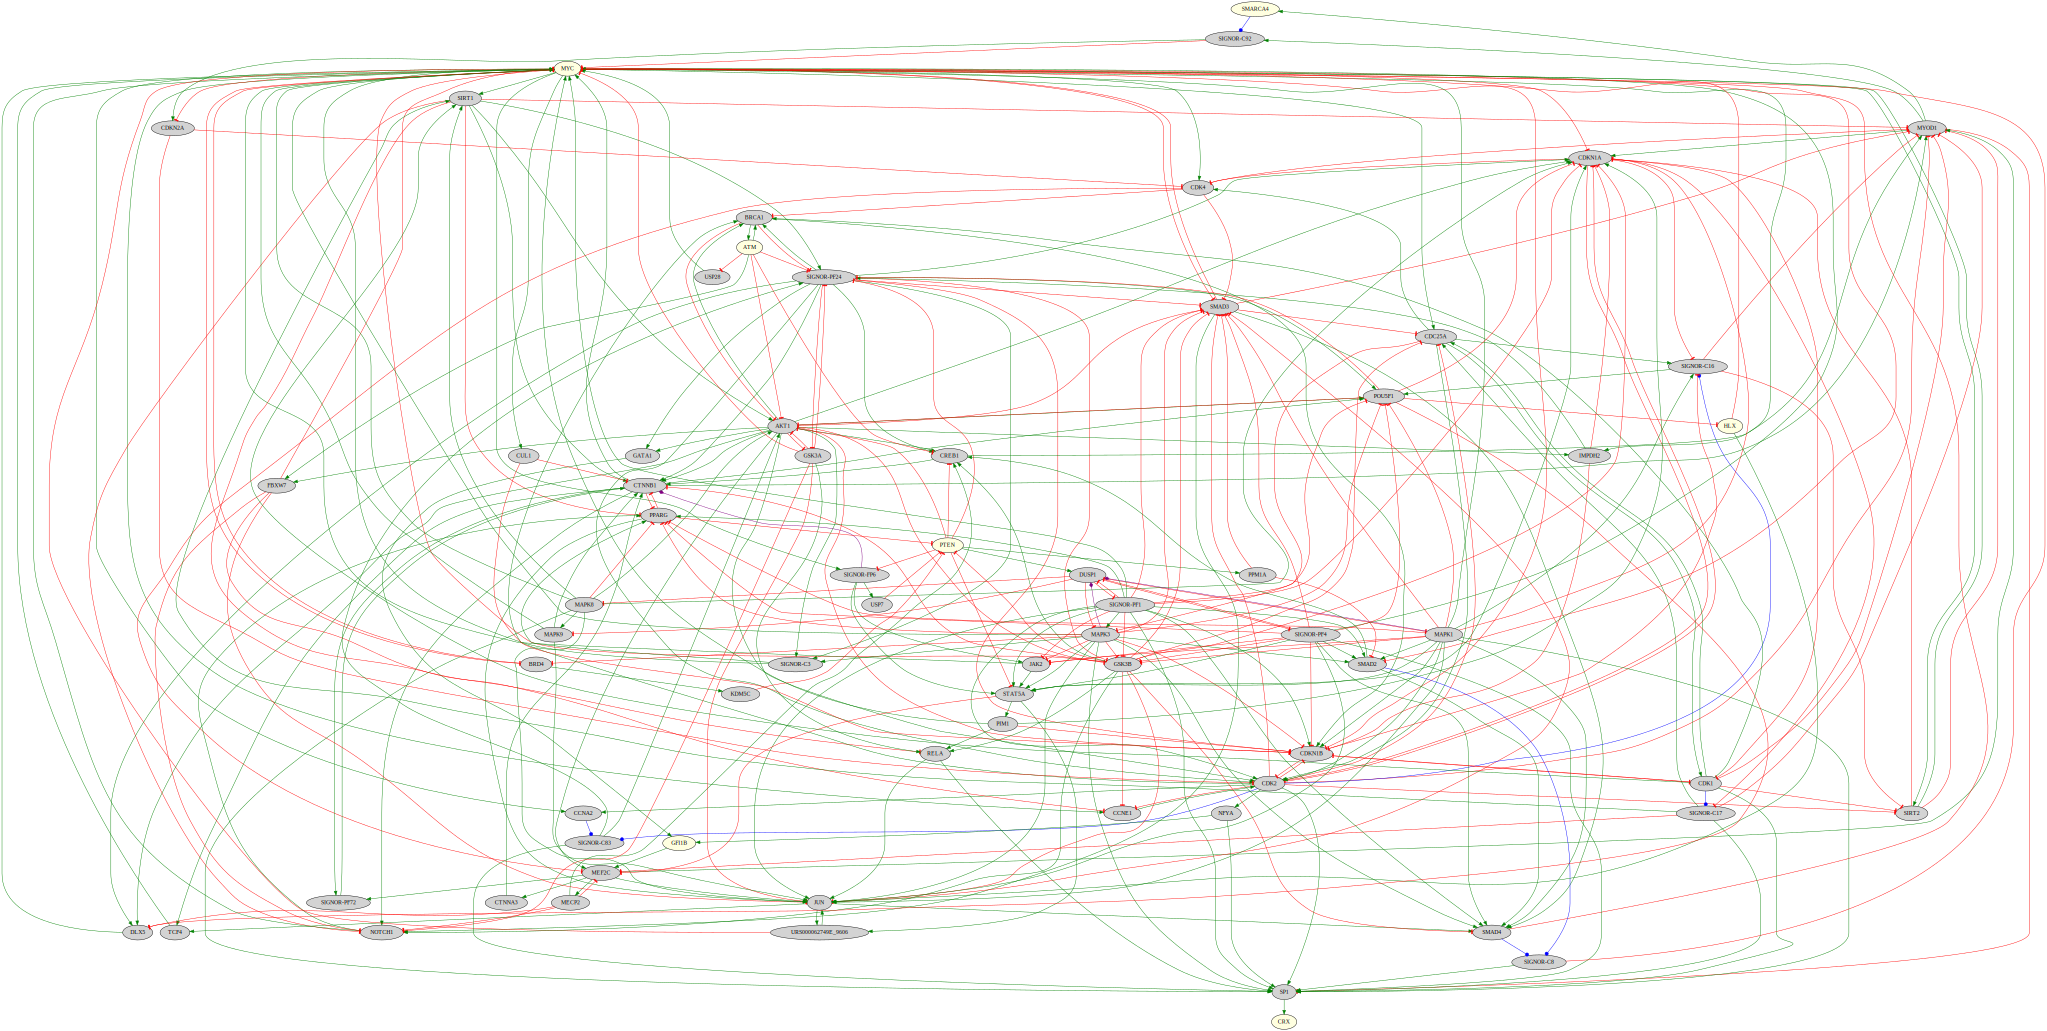

In [46]:
group3_visualizer = NetworkVisualizer(group3_net,color_by='effect', noi=True)
output = figures_folder + "Group3_signor_Northcott"
group3_visualizer.render(output_file=output)

# Exporting Network in sif file

In [47]:
from neko._outputs.exports import Exports

In [48]:
for node in group3_net.nodes["Uniprot"]:
    if node not in group3_net.edges["source"].values and node not in group3_net.edges["target"].values:
        node = group3_net.nodes[ group3_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        group3_net.remove_node(node[0])

In [49]:
export = Exports(group3_net)

In [50]:
export.export_sif(sif_output + "group3_signor_Northcott.sif")